# **Proyecto 1**
## Mineria de Datos

#### Integrantes:
- Pedro Pablo Arriola Jimenez (20188)
- Jose Rodrigo Barrera Garcia (20807)
- Alejandro Jose Gomez Hernandez (20347)
- Oscar Fernando Lopez Barrios (20679)
- Roberto Vallecillos Chinchilla (20441)

### **Problematica**

### Seccion 1.1 - Carga de datos

In [1]:
# Se importan las librerias necesarias para poder trabajar con los datos
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Se cargaran los datos por año en diferentes dataframes
df_2009 = pd.read_csv('./data/Nacimientos2009.csv')
df_2010 = pd.read_csv('./data/Nacimientos2010.csv')
df_2011 = pd.read_csv('./data/Nacimientos2011.csv')
df_2012 = pd.read_csv('./data/Nacimientos2012.csv')
df_2013 = pd.read_csv('./data/Nacimientos2013.csv')
df_2014 = pd.read_csv('./data/Nacimientos2014.csv')
df_2015 = pd.read_csv('./data/Nacimientos2015.csv')
df_2016 = pd.read_csv('./data/Nacimientos2016.csv')
df_2017 = pd.read_csv('./data/Nacimientos2017.csv')
df_2018 = pd.read_csv('./data/Nacimientos2018.csv')
df_2019 = pd.read_csv('./data/Nacimientos2019.csv')
df_2020 = pd.read_csv('./data/Nacimientos2020.csv')
df_2021 = pd.read_csv('./data/Nacimientos2021.csv')

In [3]:
# Ahora se le asignara a los datos el año correspondiente para identificar
df_2009['Año'] = 2009
df_2010['Año'] = 2010
df_2011['Año'] = 2011
df_2012['Año'] = 2012
df_2013['Año'] = 2013
df_2014['Año'] = 2014
df_2015['Año'] = 2015
df_2016['Año'] = 2016
df_2017['Año'] = 2017
df_2018['Año'] = 2018
df_2019['Año'] = 2019
df_2020['Año'] = 2020
df_2021['Año'] = 2021

In [4]:
# Ahora se unen todos los dataframes en uno solo para tener completo el dataset
dfs = [df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021]

df_merged = pd.concat(dfs, ignore_index=True)

df_merged.head()

,Departamentoderesidencia,Total,Soltera,Casada,Unida,Ignorado,Año
0,Guatemala,"58,906","27,439","31,343",55,69,2009
1,ElProgreso,"3,814","1,553","2,243",13,5,2009
2,Sacatepéquez,"6,708","3,825","2,874",5,4,2009
3,Chimaltenango,"14,482","9,898","4,566",11,7,2009
4,Escuintla,"14,552","4,993","9,437",67,55,2009


### 1.2 - Limpieza de datos

In [5]:
# Se reemplazaran los valores faltantes con 0
df_merged = df_merged.replace('-', '0')
df_merged

,Departamentoderesidencia,Total,Soltera,Casada,Unida,Ignorado,Año
0,Guatemala,"58,906","27,439","31,343",55,69,2009
1,ElProgreso,"3,814","1,553","2,243",13,5,2009
2,Sacatepéquez,"6,708","3,825","2,874",5,4,2009
3,Chimaltenango,"14,482","9,898","4,566",11,7,2009
4,Escuintla,"14,552","4,993","9,437",67,55,2009
...,...,...,...,...,...,...,...
307,Chiquimula,"10,388","7,331","3,043",8,6,2021
308,Jalapa,"8,707","6,272","2,434",1,0,2021
309,Jutiapa,"10,170","6,595","3,557",18,0,2021
310,Extranjero,328,250,40,0,38,2021


In [6]:
# Se hace casting de los datos al tipo de datos correcto de cada columna y se manejan valores NaN
df_merged['Total'] = df_merged['Soltera'].str.replace(',', '').fillna(0).astype(int)
df_merged['Soltera'] = df_merged['Soltera'].str.replace(',', '').fillna(0).astype(int)
df_merged['Casada'] = df_merged['Casada'].str.replace(',', '').fillna(0).astype(int)
df_merged['Unida'] = df_merged['Unida'].str.replace(',', '').fillna(0).astype(int)
df_merged['Ignorado'] = df_merged['Ignorado'].str.replace(',', '').fillna(0).astype(int)

In [7]:
# Se descartan todas las filas de 'Extranjero' e 'Ignorado' ya que se esta estudiando la parte geografica
df_merged = df_merged[(df_merged['Departamentoderesidencia'] != 'Extranjero') & (df_merged['Departamentoderesidencia'] != 'Ignorado')]

In [8]:
# Crear un diccionario de mapeo de departamentos a valores numéricos
departamentos = {
    'Guatemala': 1,
    'ElProgreso': 2,
    'Sacatepéquez': 3,
    'Chimaltenango': 4,
    'Escuintla': 5,
    'SantaRosa': 6,
    'Sololá': 7,
    'Totonicapán': 8,
    'Quetzaltenango': 9,
    'Suchitepéquez': 10,
    'Retalhuleu': 11,
    'SanMarcos': 12,
    'Huehuetenango': 13,
    'Quiché': 14,
    'BajaVerapaz': 15,
    'AltaVerapaz': 16,
    'Petén': 17,
    'Izabal': 18,
    'Zacapa': 19,
    'Chiquimula': 20,
    'Jalapa': 21,
    'Jutiapa': 22
}

# Aplicar el mapeo de departamentos al DataFrame
df_merged['Departamento'] = df_merged['Departamentoderesidencia'].map(departamentos)

# Eliminar la columna 'Departamentoderesidencia' original
df_merged = df_merged.drop('Departamentoderesidencia', axis=1)

/var/folders/px/hgwfbp6x6h7935z1rly0brtm0000gn/T/ipykernel_57880/3517421548.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged['Departamento'] = df_merged['Departamentoderesidencia'].map(departamentos)


### 1.3 -  Analisis exploratorio de los datos

In [9]:
# Se observan los primeros 10 datos del dataset
df_merged.head(10)

,Total,Soltera,Casada,Unida,Ignorado,Año,Departamento
0,27439,27439,31343,55,0,2009,1
1,1553,1553,2243,13,0,2009,2
2,3825,3825,2874,5,0,2009,3
3,9898,9898,4566,11,0,2009,4
4,4993,4993,9437,67,0,2009,5
5,2871,2871,5278,18,0,2009,6
6,4854,4854,4551,95,0,2009,7
7,6836,6836,4495,65,0,2009,8
8,8852,8852,9736,38,0,2009,9
9,6247,6247,6419,15,0,2009,10


In [10]:
# Se observan los ultimos 10 datos del dataset
df_merged.tail(10)

,Total,Soltera,Casada,Unida,Ignorado,Año,Departamento
300,25358,25358,10194,1,5,2021,13
301,17570,17570,11724,3,6,2021,14
302,4288,4288,3169,1,0,2021,15
303,20521,20521,12768,27,10,2021,16
304,10207,10207,3739,146,3,2021,17
305,6887,6887,2196,0,6,2021,18
306,3882,3882,1489,2,3,2021,19
307,7331,7331,3043,8,6,2021,20
308,6272,6272,2434,1,0,2021,21
309,6595,6595,3557,18,0,2021,22


In [11]:
# Se explora la forma del dataset
df_merged.shape

(286, 7)

In [12]:
# Se exploran los tipos de datos de cada columna
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 309
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Total         286 non-null    int64
 1   Soltera       286 non-null    int64
 2   Casada        286 non-null    int64
 3   Unida         286 non-null    int64
 4   Ignorado      286 non-null    int64
 5   Año           286 non-null    int64
 6   Departamento  286 non-null    int64
dtypes: int64(7)
memory usage: 17.9 KB


In [13]:
# Se muestran datos estadisticos preliminares
df_merged.describe()

,Total,Soltera,Casada,Unida,Ignorado,Año,Departamento
count,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000,286.000000
mean,9801.975524,9801.975524,7088.192308,44.017483,4.181818,2015.000000,11.500000
std,8093.208497,8093.208497,5786.113255,110.428208,7.427910,3.748216,6.355409
min,1553.000000,1553.000000,1053.000000,0.000000,0.000000,2009.000000,1.000000
25%,4579.000000,4579.000000,3356.250000,2.000000,0.000000,2012.000000,6.000000
50%,6660.000000,6660.000000,4621.500000,10.000000,2.000000,2015.000000,11.500000
75%,11123.000000,11123.000000,9609.750000,30.000000,5.000000,2018.000000,17.000000
max,39829.000000,39829.000000,31343.000000,725.000000,82.000000,2021.000000,22.000000


In [16]:
# Cantidad de nacimientos registrados por año
df_suma_por_año = df_merged.groupby('Año')['Total'].sum()
print("Cantidad de nacimientos registrados por año")
df_suma_por_año

Cantidad de nacimientos registrados por año


Año
2009    159291
2010    203229
2011    210534
2012    220900
2013    220931
2014    222129
2015    224861
2016    226871
2017    229927
2018    233749
2019    224750
2020    211044
2021    215149
Name: Total, dtype: int64

In [18]:
# Se verifica una vez por la existencia de valores NaN
df_merged.isna().any()

Total           False
Soltera         False
Casada          False
Unida           False
Ignorado        False
Año             False
Departamento    False
dtype: bool

### Seccion 1.4 - Visualizacion de los datos por medio de graficas

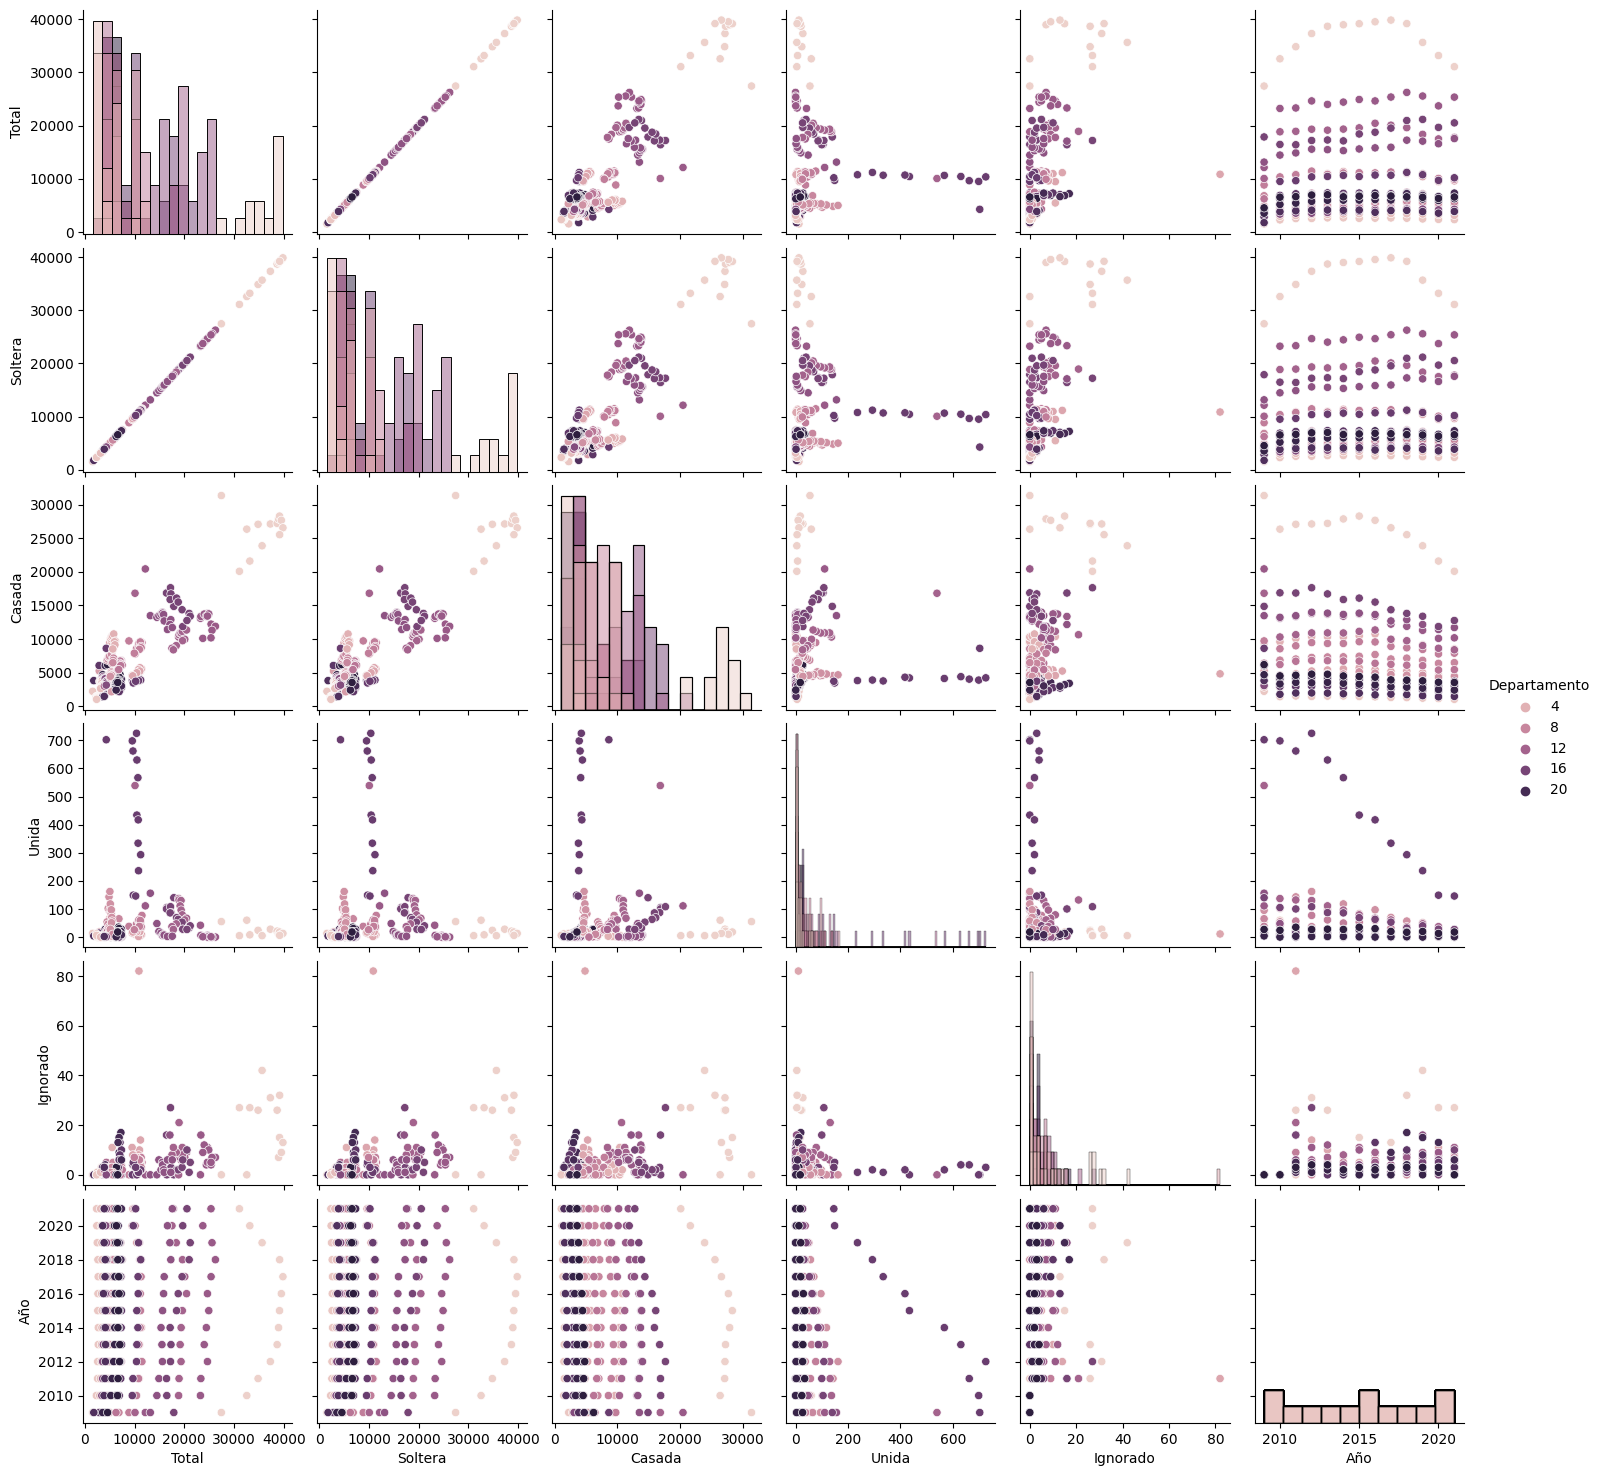

In [20]:
sns.pairplot(df_merged, hue="Departamento", diag_kind="hist")

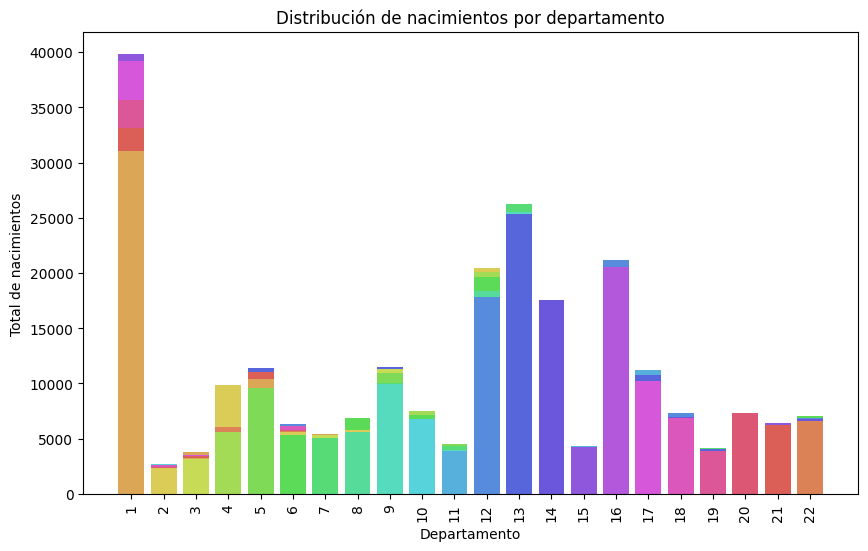

In [28]:
# Crear el gráfico de barras con los nombres de los departamentos y colores asignados
plt.figure(figsize=(10, 6))

# Definir una paleta de colores personalizada con 22 colores distintos
colors = sns.color_palette('hls', 22)

# Iterar sobre las filas del DataFrame
for index, row in df_merged.iterrows():
    departamento = row['Departamento']
    total = row['Total']
    color = colors[index % len(colors)]  # Obtener el color utilizando el índice módulo la longitud de la lista de colores
    plt.bar(departamento, total, color=color)

plt.xlabel('Departamento')
plt.ylabel('Total de nacimientos')
plt.title('Distribución de nacimientos por departamento')
# Configurar la escala del eje x de uno en uno
plt.xticks(range(1, len(departamentos) + 1), range(1, len(departamentos) + 1))
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

<AxesSubplot: >

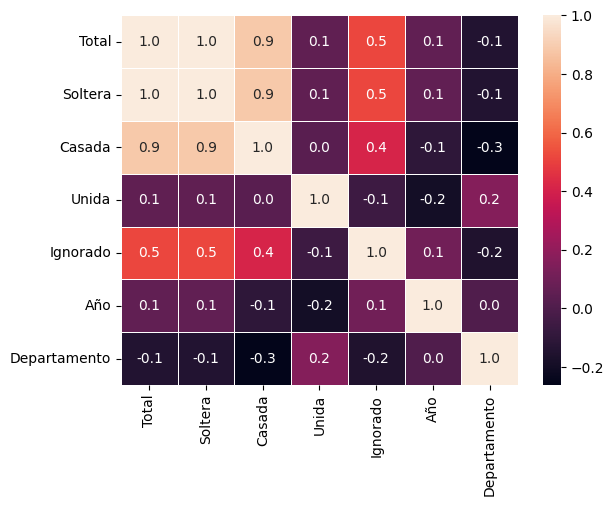

In [30]:
# Ahora se hara un heatmap para observar la correlacion que existe entre las variables del dataset
correlation = df_merged.corr()
sns.heatmap(correlation, annot=True, fmt=".1f", linewidth=.5)